## Bayesian Approach

Assume $\rho^*(x)$ is random. where $\rho^*(x) = \rho(x) - i \rho(x) \tan(\varphi (x))$

- DC resistivity = $\rho(x)$
- phase angle $\varphi(x)$

These are random factions assumption.

Data are unknown and related via:

$$
d = \mathcal{F}(\rho, \varphi) + \eta
$$

$\eta$ is random measurement error that follows a Guassian dist. with 0 mean and covariance $\Sigma$ and $\mathcal{F}$ is the forward map as a function of $\rho$ and $\phi$ 

### The Posterior

Solutions to Bayesian inverse problem is the **Posterior**: $\mathcal{P}(\rho, \varphi | d)$ (conditional dist. given $d$). Where from Bayes rule:

$$
\mathcal{P}(\rho, \varphi | d) \propto \mathcal{P}(d|\rho, \varphi) \mathcal{P}(\rho, \varphi) = \mathcal{P}(d|\rho, \varphi) \mathcal{P}(\rho) \mathcal{P}(\varphi)
$$

$\rho$ and $\phi$ independent under prior.

Here the likelihood of the data is $\mathcal{P}(d|\rho, \varphi)$ and under a Gaussian assumption on $\eta$ gives:

$$
\mathcal{P}(d|\rho, \varphi) \propto \exp \left[ \frac{-1}{2} \lVert \Sigma^{\frac{-1}{2}} (d - \mathcal{F}(\rho, \varphi))\rVert^2 \right]
$$

**Ensemble Kalman Inversion (EKI)** can be used to estimate the joint posterior, $\mathcal{P}(\rho, \varphi | d)$ along with the marginal posteriors $\mathcal{P}(\rho | d)$ and $\mathcal{P}(\varphi | d)$

Now approximate the marginal $\mathcal{P}(\rho | d)$ using $\mathcal{P}(d | \rho,, \varphi = 0)$ giving:

$$
\mathcal{P}(\rho | d) \propto \int \mathcal{P}(d|\rho, \varphi) \mathcal{P}(\rho) \mathcal{P}(\varphi) d\varphi
$$

$$
\approx \int \mathcal{P}(d|\rho, \varphi = 0) \mathcal{P}(\rho) \mathcal{P}(\varphi) d\varphi = \mathcal{P}(d|\rho, \varphi = 0) \mathcal{P}(\varphi)
$$

Marginal posterior of phase angle

$$
\mathcal{P}(\varphi | d) \propto \int \mathcal{P}(d|\rho, \varphi) \mathcal{P}(\rho) \mathcal{P}(\varphi) d\varphi
$$

$$
\approx \int \mathcal{P}(d|\rho = \bar{\rho}, \varphi) \mathcal{P}(\rho) \mathcal{P}(\varphi) d\varphi = \mathcal{P}(d|\rho = \bar{\rho}, \varphi) \mathcal{P}(\varphi)
$$

Here $\bar{\rho}$ denotes the mean of the marginal posterior $\mathcal{P}(\rho | d)$

Now sub in the likelihood to get:

**DC**
$$
\mathcal{P}(\rho | d) \propto \left[ \frac{-1}{2} \lVert \Sigma^{\frac{-1}{2}} (d - \mathcal{F}_{\rho}(\rho))\rVert^2 \right] \mathcal{P}(\rho)
$$

**phase**
$$
\mathcal{P}(\varphi | d) \propto \left[ \frac{-1}{2} \lVert \Sigma^{\frac{-1}{2}} (d - \mathcal{F}_{\varphi}(\varphi))\rVert^2 \right] \mathcal{P}(\varphi)
$$


Compute marginal posterior for DC keeping phase fixed in the likelihood. Then use a fixed DC for the likelihood in phase marginal posterior.

Next use EKI to generate samples from the above. Will show then show how to model discontinuous properties. 

### Parameterization

Take $\rho(x)$ for example takes on $n$ unkown resistivity values. so $\rho_0 ... \rho_n$ on regions $\Omega_0 ... \Omega_n$.

These are parameterized thresholding a level-set function $\xi$

This is defined:

$$
\Omega_0 = \left[x : \xi(x) \leq \alpha_0\right]
$$
$$
\Omega_1 = \left[x : \alpha_0 < \xi(x) \leq \alpha_1\right]
$$
.

.

.
$$
\Omega_{n - 1} = \left[x : \xi(x) \alpha_{n-2} < \xi(x) \leq \alpha_{n-1} \right]
$$

$$
\Omega_n = \left[x : \xi(x) \leq \alpha_{n-1}\right]
$$

 The objective then is that EKI is a derivative free tool for IP with uncertainty.

 Need trick to handle regions of overlap. (Dorn & Villegas, 2008))

Using the marginal posterior can be defined in terms of joint posteriors of $\rho_0....\rho_n$ and defined regions $\xi(x)$ (level setting)

Define $\xi$ as Guassian random fields. Then approximate the re-parameterized marginal posteriors via EKI.

define phyical properties:

$$
u_p(x) = \left( \rho_0...\rho_n, \nu, L0...L_{n-1}, \omega(x) \right)
$$

One step further is taken and paramerize $\xi$ using stochastic pde's (2D realisations of GRFs)

$$
P(u_p) = P^{LS}\left(\rho_0...\rho_n, P^{GRF}(\nu, L0...L_{n-1}, \omega(x))\right)
$$

**Approximate Posterior**

$$
\mathcal{P}(u_\rho | d) \propto \exp \left[ \frac{-1}{2} \lVert \Sigma^{\frac{-1}{2}} (d - \mathcal{F}_{\rho}(P(u_\rho)))\rVert^2 \right] \mathcal{P}(u_p)
$$

where $\mathcal{P}(u_p)$ is the prior which is the prior info of each parameters.

# NEW STUFF

## GDA

In [1]:
import numpy as np

def gaussian_discriminant_analysis(X, y):
    """
    Performs Gaussian discriminant analysis under the assumption of common diagonal covariance matrices.

    Args:
        X: A numpy array of shape (n_samples, n_features) containing the training data.
        y: A numpy array of shape (n_samples,) containing the labels for the training data.

    Returns:
        A tuple containing the mean vectors, diagonal covariance matrix, and class priors.
    """
    n_classes = len(np.unique(y))
    n_features = X.shape[1]

    # Calculate mean vectors for each class
    means = []
    for i in range(n_classes):
        means.append(np.mean(X[y == i], axis=0))

    # Calculate the diagonal covariance matrix
    cov = np.zeros((n_features, n_features))
    for i in range(n_classes):
        cov += np.diag(np.var(X[y == i], axis=0)) / n_classes

    # Calculate class priors
    priors = np.zeros(n_classes)
    for i in range(n_classes):
        priors[i] = np.mean(y == i)

    return means, cov, priors


C:\Users\johnk\AppData\Local\Temp\ipykernel_30268\1300578874.py:30: RuntimeWarning: covariance is not positive-semidefinite.
  X[i,:] = np.random.multivariate_normal(true_means[c], true_cov[c], 1).flatten()


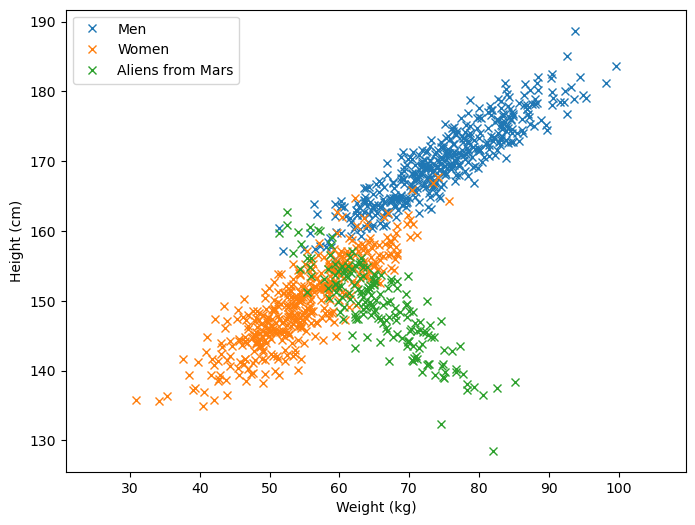

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n = 1000
X = np.zeros((n,2)) # initialize our data
y = np.zeros((n, 3))

true_theta = [0.4, 0.4, 0.2] # class probabilities

#class means
true_means = [
              [75, 170], #men
              [55, 150], #women
              [65, 150]  #aliens
             ]
#class covariances
true_cov = [[[80, 50], [-5, 2]],
            [[60, 50], [-8, 2]],
            [[60, -50], [8, 2]]
           ]

for i in range(n):
    # note - this code would be a lot faster if you vectorized this loop...
    
    # sample a class label
    y[i,:] = np.random.multinomial(1, true_theta, size=1).flatten()
    c = np.argmax(y[i,:])
    # sample the corresponding features.
    X[i,:] = np.random.multivariate_normal(true_means[c], true_cov[c], 1).flatten()

plt.figure(figsize=(8,6))
plt.plot(X[y[:,0]==1,0], X[y[:,0]==1,1], 'x', label='Men')
plt.plot(X[y[:,1]==1,0], X[y[:,1]==1,1], 'x', label='Women')
plt.plot(X[y[:,2]==1,0], X[y[:,2]==1,1], 'x', label='Aliens from Mars')
plt.axis('equal')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend(loc=2)
plt.show()